# Module 2 Project - Exploratory Data Analysis on Melbourne Housing
## **Name:** Craig Case
## **Started:** Oct 3 at 3:49pm

## Quiz Instructions
### Instructions
In this project, you will practice creating graphs in exploratory data analysis using matplotlib and seaborn.

Melbourne, Australia's second-largest city, is known for its vibrant cultural scene, diverse population, and beautiful parks. It boasts iconic landmarks like Federation Square and the Royal Botanic Gardens, as well as a thriving coffee culture. Melbourne is famous for its sports passion, hosting events like the Australian Open and Melbourne Cup, making it a dynamic and cosmopolitan destination.

Recently, the housing market in Melbourne has seen explosive growth. In this project, you will conduct an exploratory data analysis to analyze trends in the housing market and try to determine trends that might be useful to an investor.

Download the data set `housing.csv`. Create your own exploratory data analysis file using Google Colab and submit a link to the file at the end of this assignment.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,house,1035000,property sold,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,5 Charles St,3,house,1465000,property sold prior,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,55a Park St,4,house,1600000,vendor bid,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,124 Yarra St,3,house,1876000,property sold,Nelson,7/5/2016,2.5,3067,4,2,0.0,245,210.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,98 Charles St,2,house,1636000,property sold,Nelson,8/10/2016,2.5,3067,2,1,2.0,256,107.0,1890.0,Yarra,Northern Metropolitan,4019


## Question 1
- Create a scatter plot that shows land size on the x-axis and price on the y-axis.
- Change the color of the points to reflect the type of the property.

In [6]:
df['Price'].max()

np.int64(9000000)

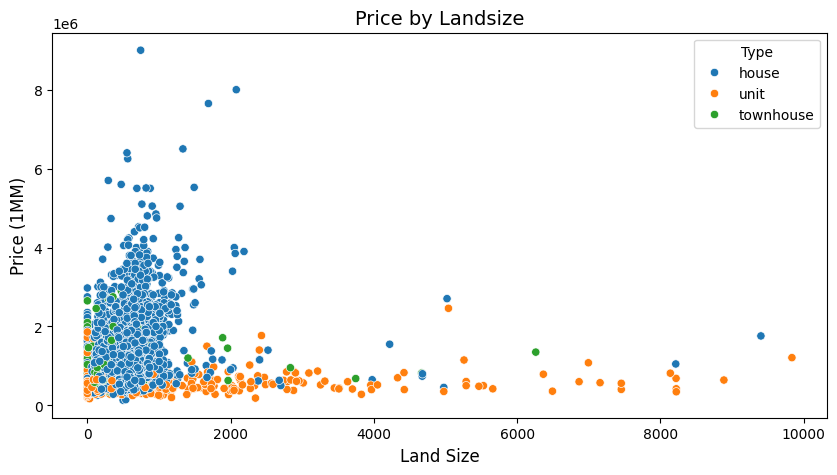

In [8]:
plt.figure(figsize=(10, 5))
scatter_plot = sns.scatterplot(data=df, x='Landsize', y='Price', hue='Type')
scatter_plot.set_title("Price by Landsize", fontsize=14)
scatter_plot.set_xlabel('Land Size', fontsize=12)
scatter_plot.set_ylabel('Price (1MM)', fontsize=12)
plt.show()

## Question 3
- Create a line chart that shows the year built along the x-axis and the average price per year on the y-axis.
- You will need to use aggregation and group by to accomplish this.

In [13]:
df['YearBuilt'] = df['YearBuilt'].astype('Int64')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6847 non-null   object 
 1   Address        6847 non-null   object 
 2   Rooms          6847 non-null   int64  
 3   Type           6847 non-null   object 
 4   Price          6847 non-null   int64  
 5   Method         6847 non-null   object 
 6   SellerG        6847 non-null   object 
 7   Date           6847 non-null   object 
 8   Distance       6847 non-null   float64
 9   Postcode       6847 non-null   int64  
 10  Bedroom2       6847 non-null   int64  
 11  Bathroom       6847 non-null   int64  
 12  Car            6819 non-null   float64
 13  Landsize       6847 non-null   int64  
 14  BuildingArea   6847 non-null   float64
 15  YearBuilt      6847 non-null   Int64  
 16  CouncilArea    6187 non-null   object 
 17  Regionname     6847 non-null   object 
 18  Property

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,6847.000000,6.847000e+03,6847.000000,6847.000000,6847.000000,6847.000000,6819.000000,6847.000000,6847.000000,6847.0,6847.000000
mean,2.977070,1.079246e+06,10.124814,3104.269461,2.950343,1.592814,1.606541,463.281145,142.959226,1964.295312,7432.043523
std,0.969548,6.732188e+05,5.978374,91.079330,0.969828,0.713867,0.944278,569.612425,82.392850,36.691828,4348.513574
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1830.0,389.000000
25%,2.000000,6.300000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,165.000000,93.000000,1940.0,4385.000000
50%,3.000000,8.925000e+05,9.200000,3083.000000,3.000000,1.000000,2.000000,402.000000,126.000000,1970.0,6567.000000
75%,4.000000,1.336500e+06,13.000000,3148.000000,4.000000,2.000000,2.000000,640.000000,173.000000,2000.0,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,9838.000000,1561.000000,2018.0,21650.000000


In [9]:
mean_price_by_year = df[['YearBuilt', 'Price']].groupby('YearBuilt', as_index=False).mean()
mean_price_by_year.head()

,YearBuilt,Price
0,1830.0,855000.0
1,1850.0,1347000.0
2,1854.0,3310000.0
3,1856.0,2260000.0
4,1860.0,1980000.0


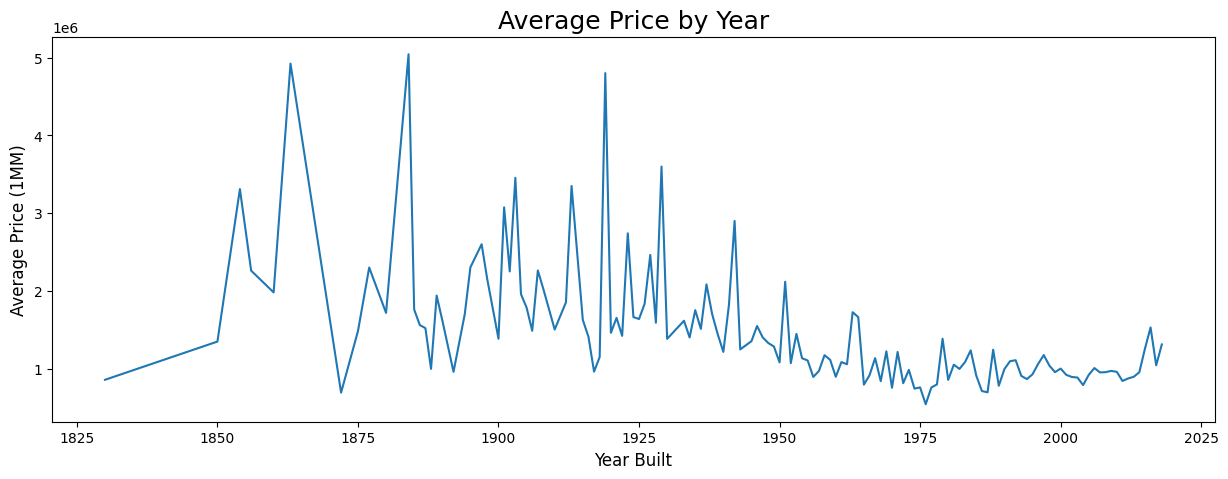

In [16]:
plt.figure(figsize=(15, 5))
line_chart = sns.lineplot(data=mean_price_by_year, x="YearBuilt", y="Price") 
#count_plot.tick_params(axis='x', rotation=45)
line_chart.set_title("Average Price by Year", fontsize=18)
line_chart.set_xlabel('Year Built', fontsize=12)
line_chart.set_ylabel('Average Price (1MM)', fontsize=12)
plt.show()

## Question 5
- Create a bar chart that shows the region on the x-axis and the average price of the property on the y-axis.
- You will need to use aggregation and group by to accomplish this.

In [17]:
mean_price_by_year = df[['Regionname', 'Price']].groupby('Regionname', as_index=False).mean()
mean_price_by_year.head()

,Regionname,Price
0,Eastern Metropolitan,1.118559e+06
1,Eastern Victoria,6.813565e+05
2,Northern Metropolitan,8.765970e+05
3,Northern Victoria,5.694400e+05
4,South-Eastern Metropolitan,9.395747e+05


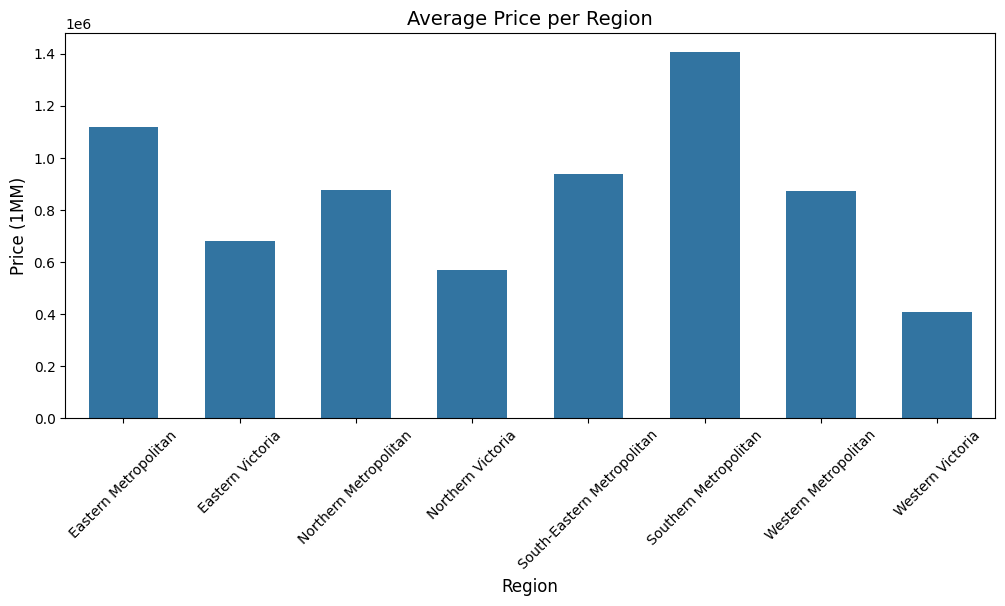

In [22]:
plt.figure(figsize=(12, 5))
count_plot = sns.barplot(x="Regionname", y="Price", data=mean_price_by_year, width=0.6)
count_plot.tick_params(axis='x', rotation=45)
count_plot.set_title("Average Price per Region", fontsize=14)
count_plot.set_xlabel('Region', fontsize=12)
count_plot.set_ylabel('Price (1MM)', fontsize=12)
plt.show()

## Question 7
Create a histogram of property prices

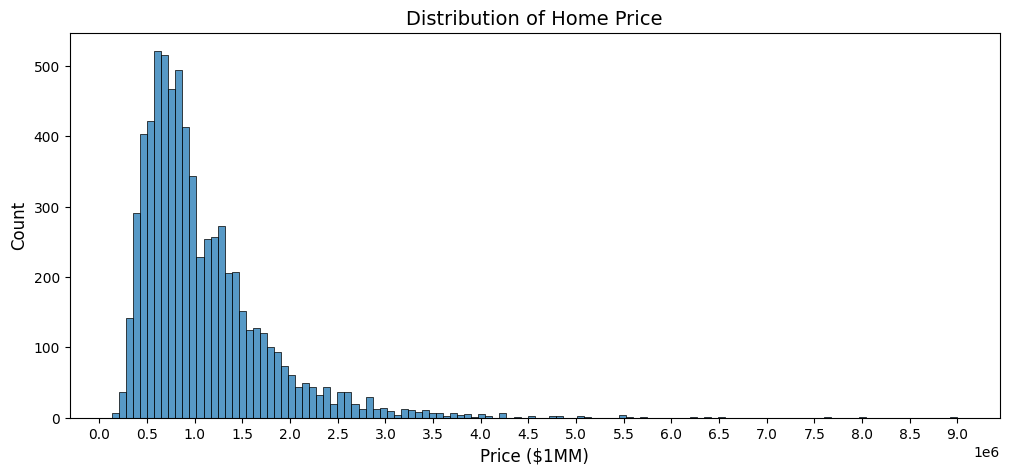

In [28]:
import matplotlib.ticker as ticker
plt.figure(figsize=(12, 5))

hist_plot = sns.histplot(data=df, x="Price")
hist_plot.set_title("Distribution of Home Price", fontsize=14)
hist_plot.set_xlabel('Price ($1MM)', fontsize=12)
hist_plot.set_ylabel('Count', fontsize=12)
hist_plot.xaxis.set_major_locator(ticker.MultipleLocator(500000))
plt.show()

## Question 9
- Create a box plot that shows the years that each property was built on the x-axis and the region on the y-axis.
- These box plots should be oriented horizontally. 

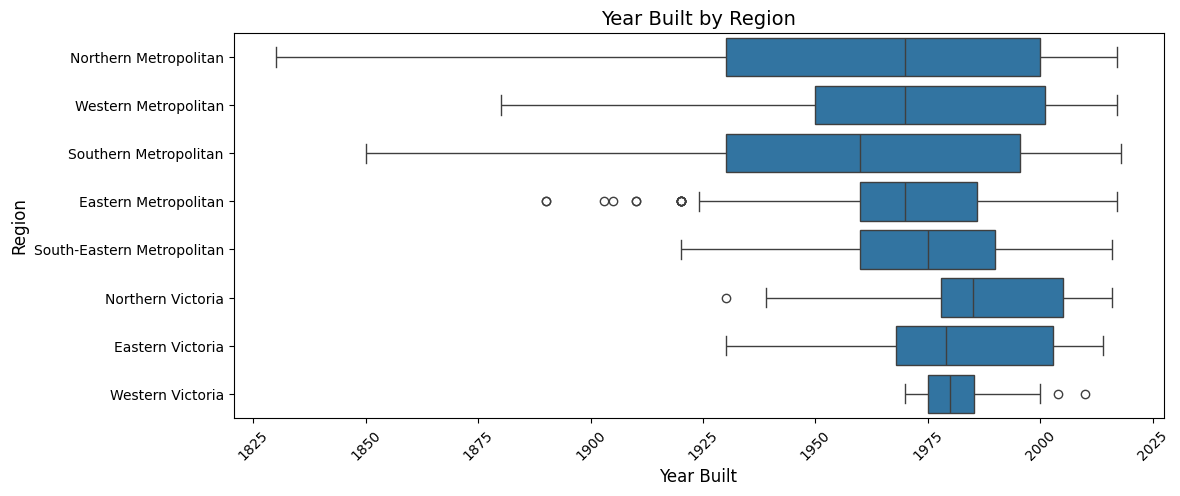

In [31]:


plt.figure(figsize=(12, 5))
box_plot = sns.boxplot(x='YearBuilt', y='Regionname', data=df, orient='h')
box_plot.tick_params(axis='x', rotation=45)
box_plot.set_title("Year Built by Region", fontsize=14)
box_plot.set_xlabel('Year Built', fontsize=12)
box_plot.set_ylabel('Region', fontsize=12)
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6847 non-null   object 
 1   Address        6847 non-null   object 
 2   Rooms          6847 non-null   int64  
 3   Type           6847 non-null   object 
 4   Price          6847 non-null   int64  
 5   Method         6847 non-null   object 
 6   SellerG        6847 non-null   object 
 7   Date           6847 non-null   object 
 8   Distance       6847 non-null   float64
 9   Postcode       6847 non-null   int64  
 10  Bedroom2       6847 non-null   int64  
 11  Bathroom       6847 non-null   int64  
 12  Car            6819 non-null   float64
 13  Landsize       6847 non-null   int64  
 14  BuildingArea   6847 non-null   float64
 15  YearBuilt      6847 non-null   float64
 16  CouncilArea    6187 non-null   object 
 17  Regionname     6847 non-null   object 
 18  Property